In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Monty Hall

5-20 mins

1. Put prizes behind doors randomly
2. I pick a door
3. Monty opens a door
4. Reveal what was behind each door

Understanding these steps is more important than understanding the code (although you should understand both).

### Step 1: Set up game

In [2]:
doors = make_array(1, 2, 3)
prizes = make_array('car', 'first goat', 'second goat')

def setup():
    """Return a random game of Let's Make a Deal."""
    return Table().with_columns(
        'Door', doors,
        'Prize', np.random.choice(prizes, 3, replace=False)
    )

a_game = setup()
a_game

Door,Prize
1,first goat
2,car
3,second goat


### Step 2: Pick a door

In [3]:
a_guess = np.random.choice(doors)
a_guess

3

### Step 3: Monty opens a door

In [4]:
def behind(game, door):
    """Return the prize behind a door."""
    return game.where('Door', door).column('Prize').item(0)

for door in doors:
    print('Behind door number', door, 'is the', behind(a_game, door))

Behind door number 1 is the first goat
Behind door number 2 is the car
Behind door number 3 is the second goat


In [5]:
def location(game, prize):
    """Return the door that hides a prize."""
    return game.where('Prize', prize).column('Door').item(0)

for prize in prizes:
    print('The', prize, 'is behind door number', location(a_game, prize))

The car is behind door number 2
The first goat is behind door number 1
The second goat is behind door number 3


In [6]:
def expose(game, guess):
    """Return the door that Monty Hall opens to expose a goat."""
    guessed_prize = behind(game, guess)
    if guessed_prize == 'first goat':
        reveal = 'second goat'
    elif guessed_prize == 'second goat':
        reveal = 'first goat'
    else:
        reveal = np.random.choice(['first goat', 'second goat'])
    return location(game, reveal)

an_exposed_door = expose(a_game, a_guess)
print('The contestant picked door', a_guess, 'which hides the', behind(a_game, a_guess))
print('Monty Hall opens door', an_exposed_door, 'to expose the', behind(a_game, an_exposed_door))

The contestant picked door 3 which hides the second goat
Monty Hall opens door 1 to expose the first goat


In [7]:
def other(game, guess, exposed):
    """Return the door that is not the guess or the exposed."""
    return (1 + 2 + 3) - guess - exposed

the_remaining_door = other(a_game, a_guess, an_exposed_door)
print('The remaining door', the_remaining_door, 'hides the', behind(a_game, the_remaining_door))

The remaining door 2 hides the car


### Step 4: See what happened, Repeat

**Let's simulate one game of the Monty Hall Problem. Create a list where the first element is the prize behind the first guess, the second is the prize behind Monty's exposed door, and the third is the prize behind the remaining door.**

In [9]:
[behind(a_game, a_guess),
 behind(a_game, an_exposed_door),
 behind(a_game, other(a_game, a_guess, an_exposed_door))]

['second goat', 'first goat', 'car']

In [13]:
trials = Table(['trial', 'guess', 'exposed', 'remaining'])
for i in np.arange(10000)+1:
    game = setup()
    guess = np.random.choice(doors)
    exposed = expose(game, guess)
    remaining = other(game, guess, exposed)
    trials.append([i, behind(game, guess), behind(game, exposed), behind(game, remaining)])
    
trials

trial,guess,exposed,remaining
1,first goat,second goat,car
2,car,second goat,first goat
3,second goat,first goat,car
4,car,second goat,first goat
5,second goat,first goat,car
6,car,second goat,first goat
7,second goat,first goat,car
8,car,first goat,second goat
9,car,first goat,second goat
10,first goat,second goat,car


In [14]:
trials.group('guess')

guess,count
car,3315
first goat,3366
second goat,3319


In [15]:
trials.group('exposed')

exposed,count
first goat,4977
second goat,5023


In [16]:
trials.group('remaining')

remaining,count
car,6685
first goat,1657
second goat,1658


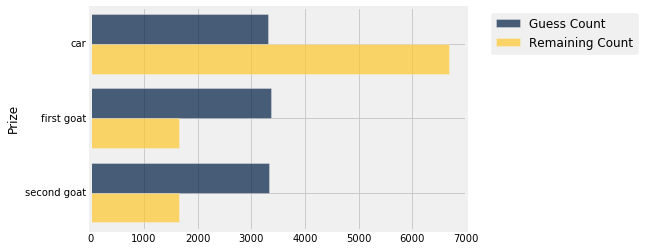

In [17]:
compare = trials.group('guess').join('guess', trials.group('remaining'), 'remaining')
compare.relabeled(0, 'Prize').relabeled(1, 'Guess Count').relabeled(2, 'Remaining Count').barh(0)

## Probability

20-30 mins

#### Tickets

Red Green Blue

What's the chance of GR when sampling two cards without replacement

RB RG BR BG GR GB

P(GR) = 1/6

P(one R and one G) = P(GR) + P(RG) = 1/6 + 1/6


## Sampling

30-40 mins

In [ ]:
top = Table.read_table('http://inferentialthinking.com/notebooks/top_movies.csv')
top = top.with_column('Row Index', np.arange(top.num_rows)).move_to_start('Row Index')
top

In [ ]:
top.take([3, 5, 7])

In [ ]:
top.where('Title', are.containing('and the'))

In [ ]:
start = np.random.choice(np.arange(10))
top.take(np.arange(start, 200, 10))

In [ ]:
top.sample(5)

In [ ]:
top.sample(5, with_replacement=False)

## Dice

40-50 mins

In [ ]:
die = Table().with_column('face', np.arange(6)+1)
die

In [ ]:
def face_hist(t):
    t.hist('face', bins=np.arange(0.5, 7, 1), unit='face')
    plt.xlabel('Face')
    
face_hist(die)

In [ ]:
face_hist(die.sample(10))

## Flights

In [ ]:
united = Table.read_table('http://inferentialthinking.com/notebooks/united_summer2015.csv')
united

In [ ]:
united.hist('Delay')

In [ ]:
def delay_hist(t):
    t.hist('Delay', unit='minute', bins=np.arange(-20, 301, 10))
    
delay_hist(united)

In [ ]:
united.where('Delay', are.between(10, 20)).num_rows / united.num_rows

In [ ]:
s = united.sample(1000)
delay_hist(s)

In [ ]:
s.where('Delay', are.between(10, 20)).num_rows / s.num_rows

## Monty Hall

In [ ]:
doors = make_array(1, 2, 3)
prizes = make_array('car', 'first goat', 'second goat')

def setup():
    """Return a random game of Let's Make a Deal."""
    return Table().with_columns(
        'Door', doors,
        'Prize', np.random.choice(prizes, 3, replace=False))

def behind(game, door):
    """Return the prize behind a door."""
    return game.where('Door', door).column('Prize').item(0)

def location(game, prize):
    """Return the door that hides a prize."""
    return game.where('Prize', prize).column('Door').item(0)

def expose(game, guess):
    """Return the door that Monty Hall opens to expose a goat."""
    guessed_prize = behind(game, guess)
    if guessed_prize == 'first goat':
        reveal = 'second goat'
    elif guessed_prize == 'second goat':
        reveal = 'first goat'
    else:
        reveal = np.random.choice(['first goat', 'second goat'])
    return location(game, reveal)

def other(game, guess, exposed):
    """Return the door that is not the guess or the exposed."""
    return (1 + 2 + 3) - guess - exposed

trials = Table(['trial', 'guess', 'exposed', 'remaining'])
for i in np.arange(10000)+1:
    game = setup()
    guess = np.random.choice(doors)
    exposed = expose(game, guess)
    remaining = other(game, guess, exposed)
    trials.append([i, behind(game, guess), behind(game, exposed), behind(game, remaining)])
    
trials

In [ ]:
counts = trials.group(['guess', 'exposed', 'remaining'])
counts

In [ ]:
counts.set_format('count', DistributionFormatter)

In [ ]:
outcomes = counts.drop('count')
outcomes

In [ ]:
chances = make_array(
    1/3 * 1/2, 
    1/3 * 1/2, 
    1/3 * 1,
    1/3 * 1
)
distribution = outcomes.with_column('chance', chances)
distribution.set_format('chance', PercentFormatter)

In [ ]:
samples = outcomes.sample(10000, weights=chances)
samples

In [ ]:
samples.group(['guess', 'exposed', 'remaining'])

Roll a die 4 times. What's P(at least one 6).

In [ ]:
1 - (5/6) ** 4

In [ ]:
rolls = np.arange(1, 51, 1)
at_least_one = Table().with_columns(
    'Rolls', rolls,
    'Chance of at least one 6', 1 - (5/6)**rolls
)
at_least_one.set_format(1, PercentFormatter(3))

In [ ]:
at_least_one.scatter('Rolls')

In [ ]:
at_least_one.where('Rolls', 20)

In [ ]:
rolls = np.random.choice(np.arange(6)+1, 20)
rolls

In [ ]:
np.count_nonzero(rolls==6)

In [ ]:
trials = 1000
successes = 0

for i in np.arange(trials):
    rolls = np.random.choice(np.arange(6)+1, 20)
    if np.count_nonzero(rolls==6) > 0:
        successes = successes + 1

successes/trials

In [ ]:
def roll_20():
    trials = 1000
    successes = 0

    for i in np.arange(trials):
        rolls = np.random.choice(np.arange(6)+1, 20)
        if np.count_nonzero(rolls==6) > 0:
            successes = successes + 1

    return successes/trials

estimates = Table(['estimate'])
for k in np.arange(1000):
    estimates.append([roll_20()])

estimates.hist(normed=False)

In [ ]:
np.average(estimates.column(0))